# Introducing poertry

## Install poetry

**`pipx install poetry`**

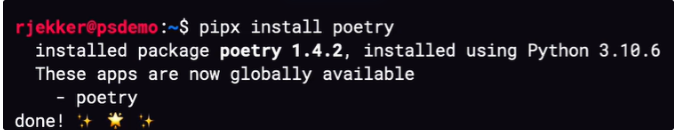

## Create a project skeleton using poetry

**`poetry new poetry_demo`**

Poetry will create a complete project skeleton, that is, it will create a folder called “poetry_demo” which will contain the following:
* poetry_demo folder → which is an actual python package with an empty init file which is meant to hold the code for the project.
* pyproject.toml file
* Empty README.md file
* tests folder → for unit tests

Let’s start by installing requirements.

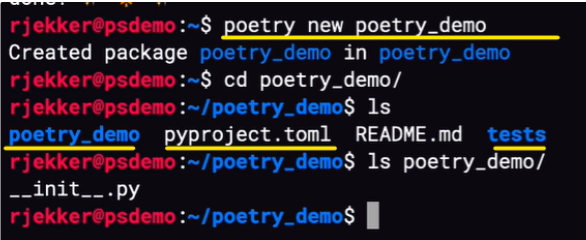

## Installing dependencies using poetry

**`poetry add arrow requests`**

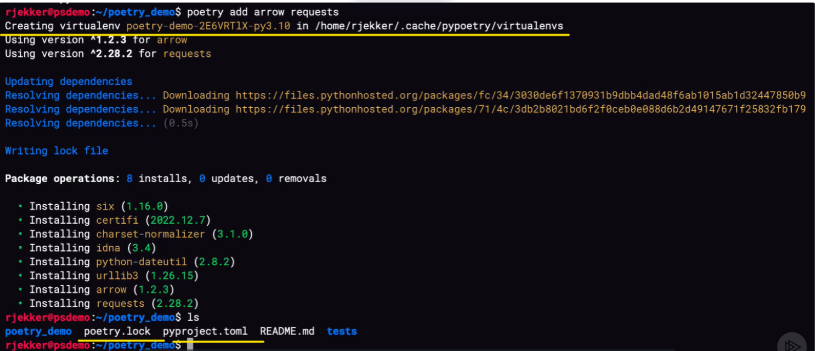

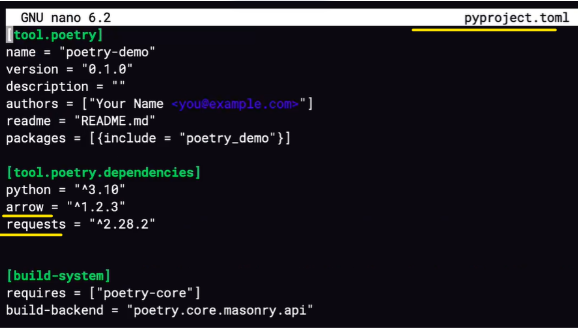

This works similar to `pipenv`. 
* It creates a virtual environment in a separate folder and it resolves and lock dependencies in `poetry.lock` file.
* The main dependencies are in the `pyproject.toml` file.
* First two sections of  pyproject.toml file are poetry specific:
    * `[tool.poetry]`
    * `[tool.poetry.dependencies]`
* The `[build-system]` section specifies that `poetry` should be the tool to use when building a `wheel` for this package.
    * So if we install this project using `pip`, then `pip` will read this and call `poetry` to create the installable `wheel` file.

Poetry has its own syntax for dependency specification and can be found at `python-poetry.org`.

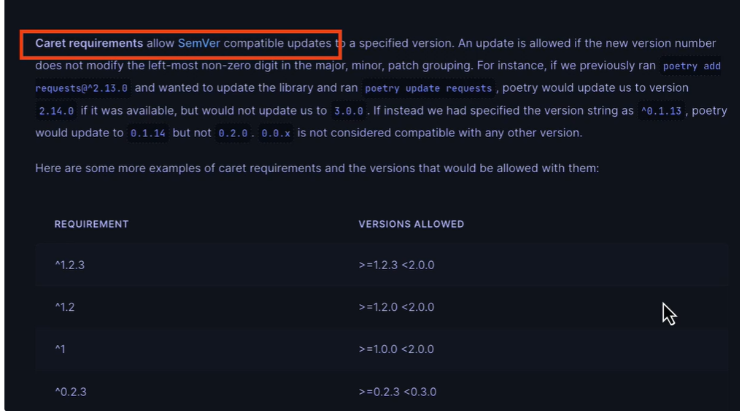

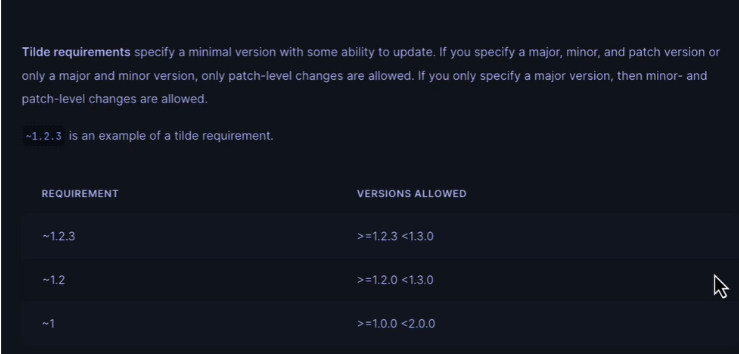

When you install with poetry, you can use all `pip version specifiers` like normal and poetry will translate that to its equivalent poetry version.

Every time when we install something, poetry also writes/updates the lock file and poetry keep track of all the files it installed with their hashes, their versions and some more metadata.

So this is how poetry makes the build **deterministic**.
* The pyproject.toml contains abstract dependencies or the to-level dependencies.
* The `poetry.lock` file contains all the detailed versions to pin all sub-dependencies.
    * One shouldn’t usally edit the lock file, that should be managed by poetry itself.
    * Editing `pyproject.toml` file is fine.

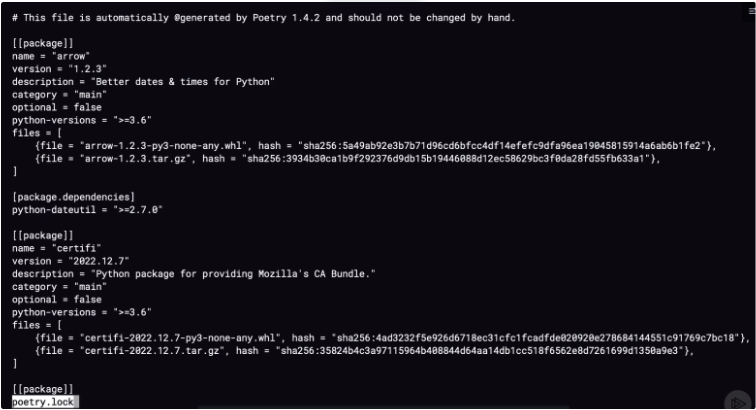

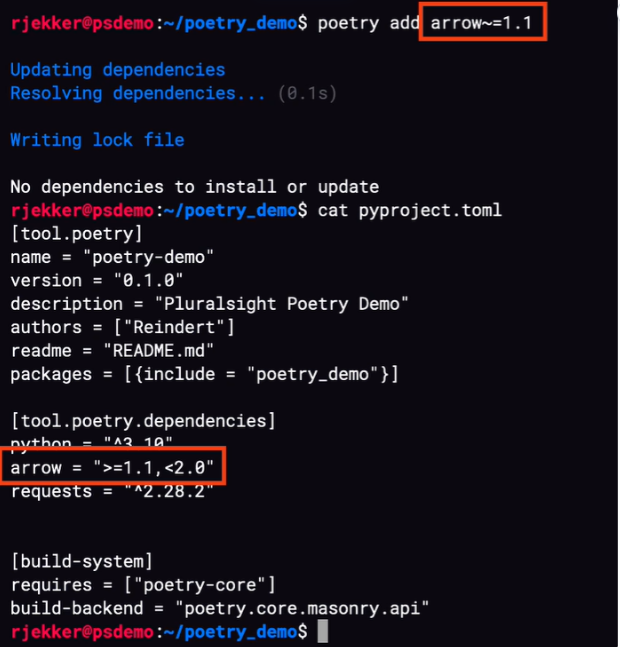

# Poetry workflow

The usual workflow after installing some packages would be to commit and push both the pyproject.toml file and the lock file to Github. But, if you’re developing a library to be used by other people, you might not want to put the lock file in version control because your goal would be to support lots of different environments. 

For now, let’s consider an application that we will run and deploy.

* Consider you’ve cloned a python project from Git Hub which contains both `pyproject.toml` and `poetry.lock`. 
* Note that the project doesn’t have a virtual environment yet.
* Now run → `poetry install`. This will install everything from the lock file. Now we have the required packages installed.
* Run → `poetry show` to see the list of installed packages.
* Run → `poetry show --tree` to see the list of installed packages in a graphical format.

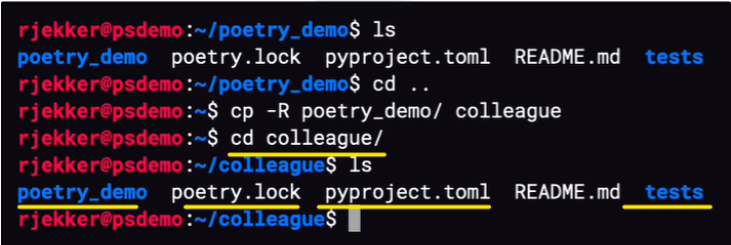

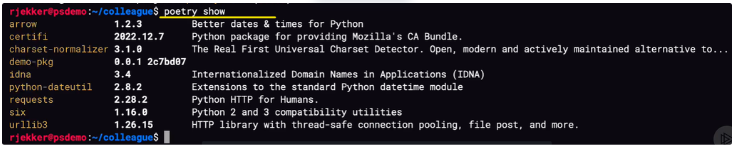

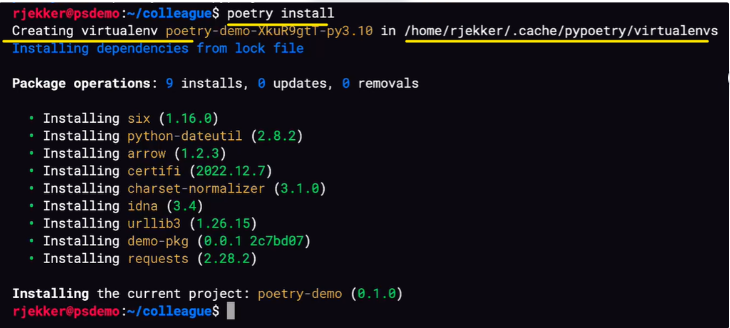

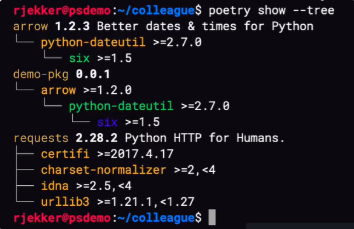

> *The `poetry add` command adds a dependency to the pyproject.toml file and installs it with all its dependencies. But if you a new version of a lock file from the team then you need to run `poerty install` to install the dependencies of the lock file.*

To remove a dependency, runt →`poetry remove` dependency_name

Just like the `add` command, the `remove` command changes the `pyproject.toml` file, regenerates the lock file, and uninstalls the package from the virtual environment.

> *Unlike `pipenv, poetry` **remove** command also removes the sub-dependencies associated with the actual dependency that is removed/uninstalled.*

Now consider a scenario where you have a poetry.lock file and you need to install it.

The `poetry.lock` file doesn’t have `requests` dependency but `requests` dependency is present in the virtual environment.

So when you install the `poetry.lock` file using `poetry install` command, the install command only installs new dependencies by default in the virtual environment if not present. But the `install` command doesn’t uninstall/remove any dependencies automatically in order to sync the virtual environment with the `poetry.lock` file.

To sync the virtual environment according to the `poetry.lock` file, run `poetry install sync` command. This will install the dependencies specified in the lock file and remove/uninstall dependencies from the virtual environment which is not there in the lock file.

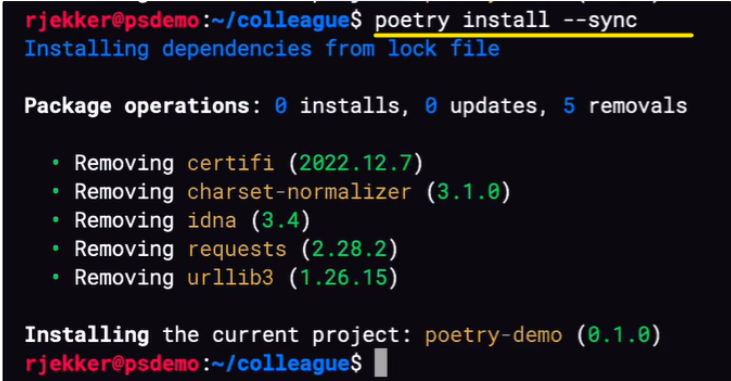

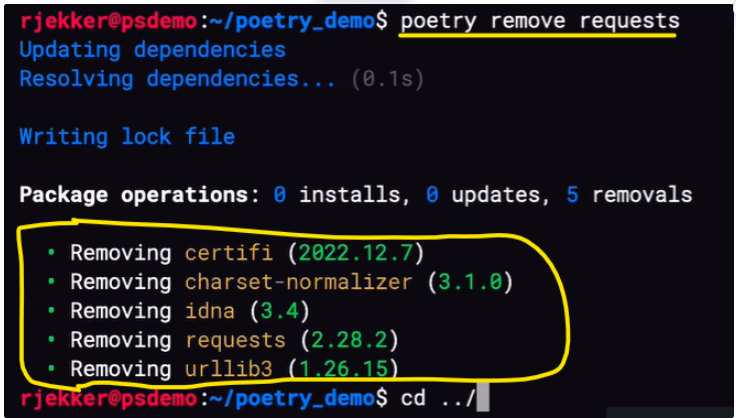

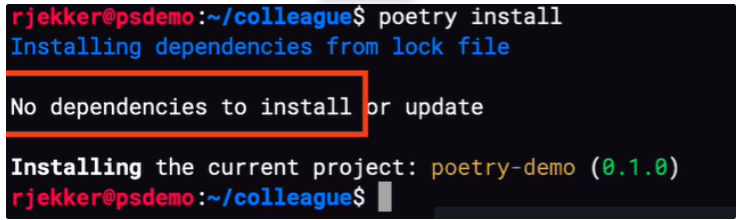

Now if building your package and uploading it to a repository is part of your workflow, `poetry` can do that as well. It contains a `build` command which builds a wheel and it has a `ublish` command which uploads it to a repository.

For using the `publish` command, we need to configure the URL and login info for the repository.

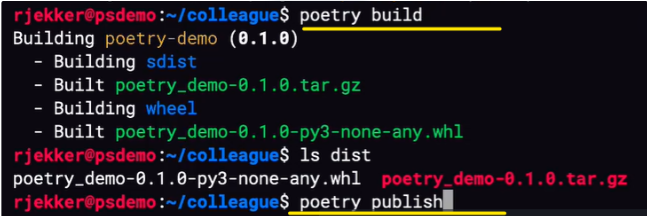

# Running commands with poetry

With poetry, we can also run things in the virtual environment. 

Poetry automatically installs a project in editable mode, that is during development, if there is a change in the project that will be automatically 

available for execution. We don’t have to install the project every time there is a change.

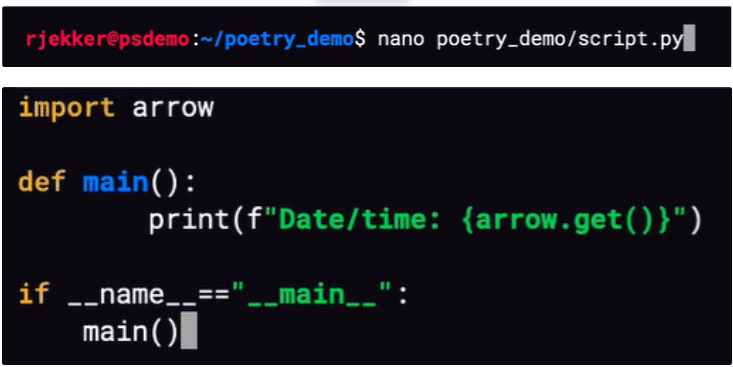

Let’s say we have a file in the project called `script.py`. We’ll now register this script as a runnable command.

In this case, we register the command as **“showtime”** which will run the `main( )` function inside `poetry_demo.scripts`.

Then install the project and run → `poetry run showtime`.

> The `poetry run` command runs anything that you give inside the virtual environment of the project.

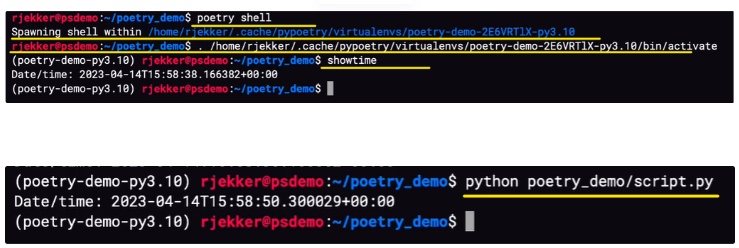

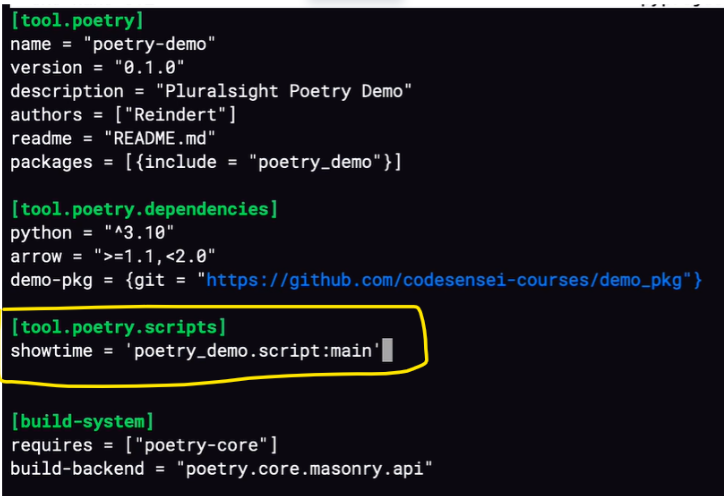

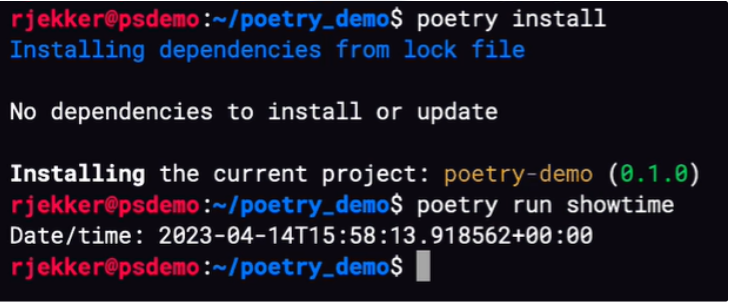

# Poetry: Groups and extras

## Default Group

Poetry offers the possibility to install dependencies in groups and to offer them as extras to other people installing our packages.

Adding `black` package in `dev` group.

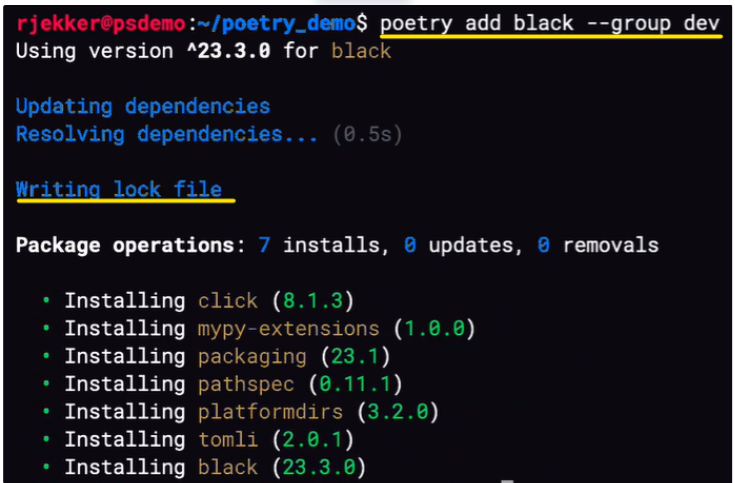

Adding `pytest` package in `test` group.

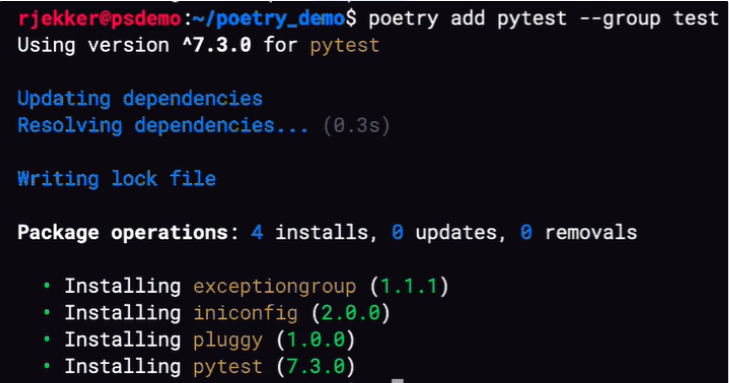

**pyproject.toml**

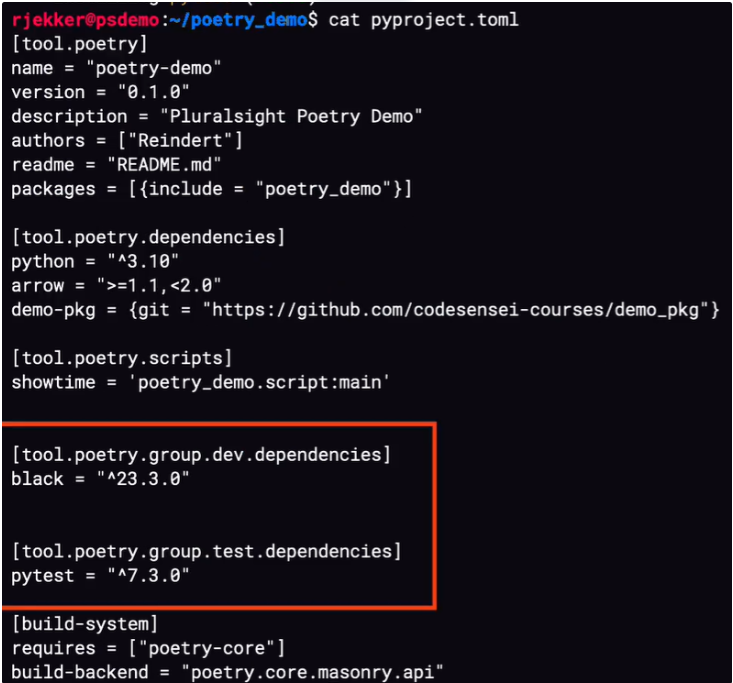

So we have two groups now, `dev` & `test`. By default, both of them are installed. So, if we install the lock file then all the packages including the `dev` & `test` group will get installed.

To exclude any group while installing packages from the lock file, use the `--without` option.

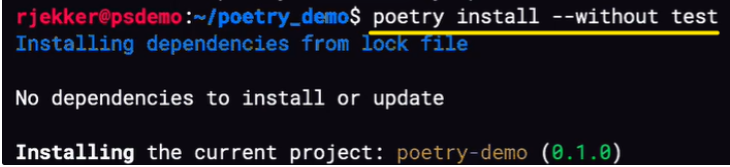

## Optional Group

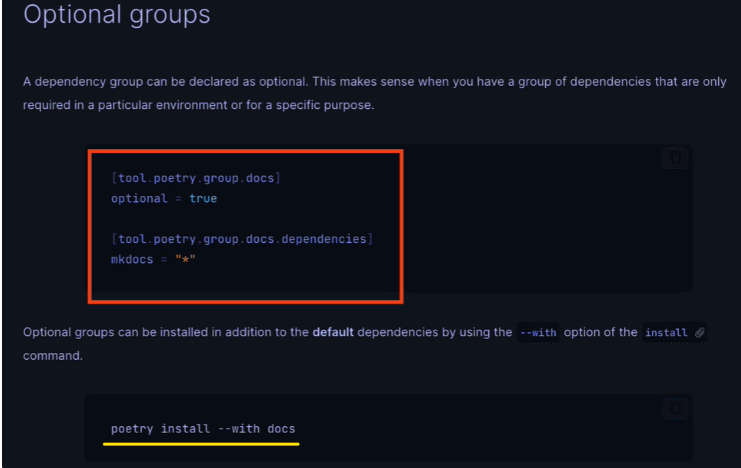

Poetry also allows **optional groups** for dependencies which will not get installed by default. To install optional group dependencies from the lock file, we need to use the `--with` option.

Now these groups are only for developers though, so developers who are working with the source code of the package and use poetry with pyproject file. They only be able to installed like with this group or without that group. But if you have a library that you distribute to end users, they will not see those groups at all, and they won’t be able to install them. The end users will just get the main dependencies.

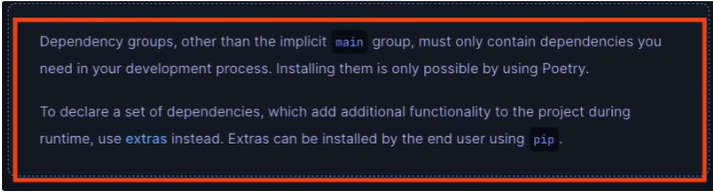


## Extras

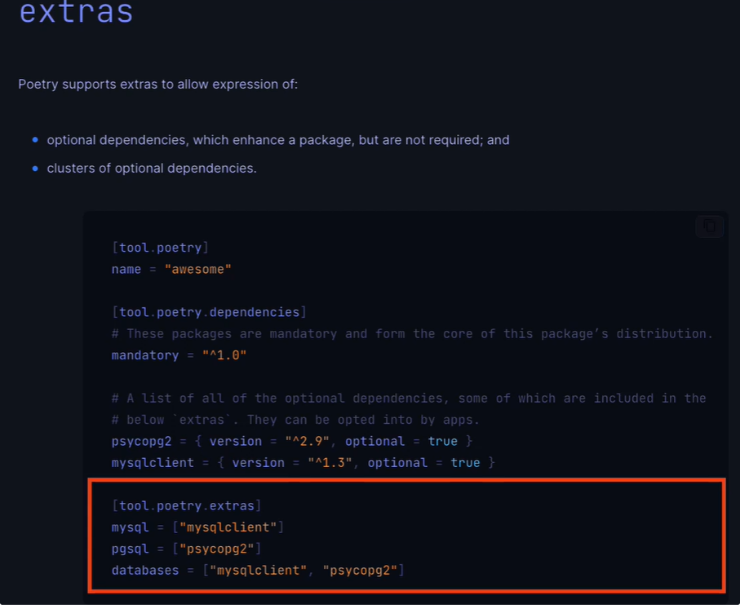

Here is an example of a toml file with some optional packages that can installed as `extras`. The extra group databases here will install both psycopg2 and mysqlclient. We can install them using `pip`.

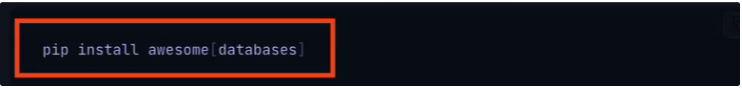

So poetry allows both dependency groups to be used at development time and `extras` groups that can be selected by the end-user when installing your package.

## Poetry: Review

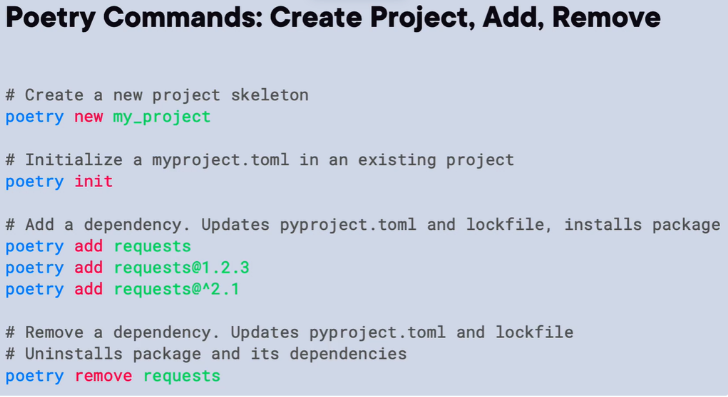

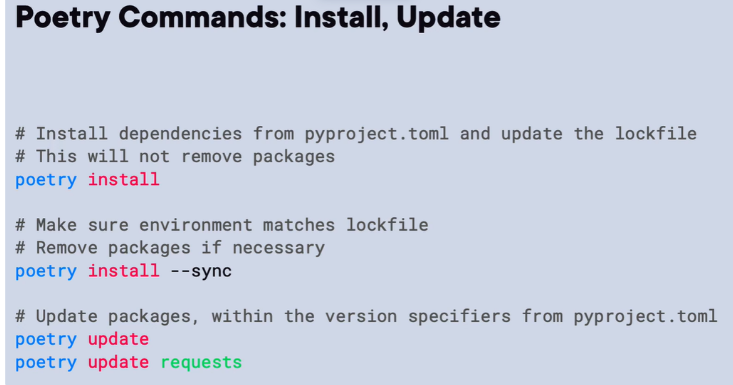

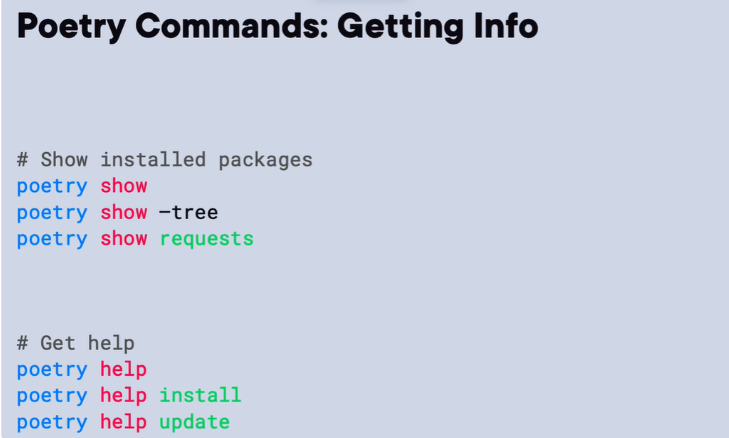

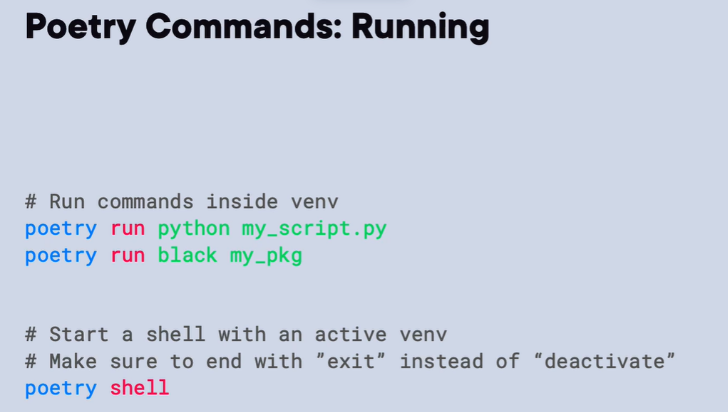

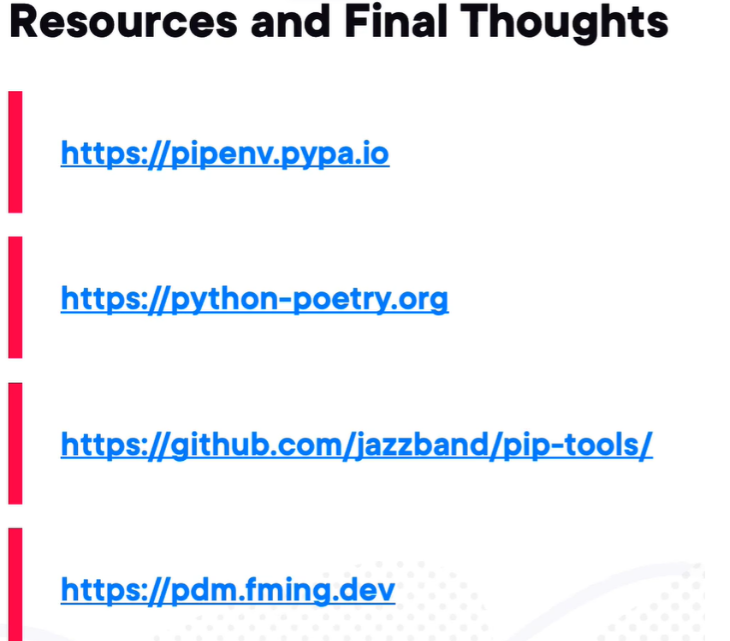

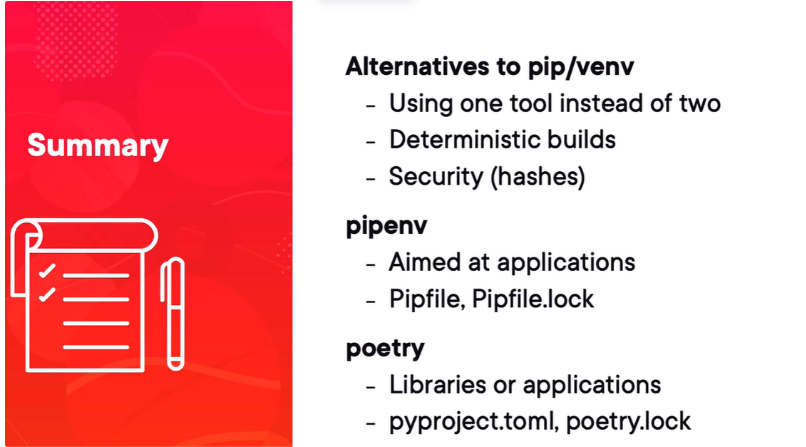